Some ideas I've had

In [125]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import config
import polars as pl
import requests
from datetime import datetime, timedelta
import time

Looking for opportunity for a reversion strategy between tech stocks

In [ ]:
#Looking for opportunity for a reversion strategy between tech stocks

def getAllTimeChange(tickers, start, end=0, color=0):
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        if end == 0:
            hist = stock.history(start=start)
        else:
            hist = stock.history(start=start, end=end)
        start_price = hist["Close"][0]
        hist["Change"] = hist["Close"] / start_price
        if color == 0:
            plt.plot(hist.index, hist["Change"], label=ticker)
        else:
            plt.plot(hist.index, hist["Change"], label=ticker, color=color)

start_date = "2024-06-01"
end_date = ""

stocks = ["TSLA", "NVDA", "AAPL", "AVGO", "MSFT"]

getAllTimeChange(stocks, start_date)
    
plt.legend()
#plt.yscale("log")

In [ ]:
def getDayChange(tickers, start, end=0, color=0):
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        if end == 0:
            hist = stock.history(start=start)
        else:
            hist = stock.history(start=start, end=end)
        change = [0]
        for i in range(1, len(hist["Close"])):
            change.append(hist["Close"][i] / hist["Close"][i-1] - 1)
        
        if color == 0:
            plt.scatter(hist.index, change, label=ticker)
        else:
            plt.scatter(hist.index, change, label=ticker, color=color)

start_date = "2024-06-01"
end_date = ""

stocks = ["TSLA", "NVDA", "AAPL", "AVGO", "MSFT"]

getDayChange(stocks, start_date)
plt.legend()

Looking for inverse correlation between supermarket stocks and fast food stocks

In [ ]:
#Looking for inverse correlation between supermarket stocks and fast food stocks
start_date = "2024-06-01"
end_date = ""

stocks = ["WMT", "TGT", "MCD", "YUM", "CMG"]
supermarket_stocks = ["WMT", "TGT"]
fast_food_stocks = ["MCD", "YUM", "CMG"]

getAllTimeChange(supermarket_stocks, start_date, color="blue")

getAllTimeChange(fast_food_stocks, start_date, color="red")

plt.legend()

In [ ]:
start_date = "2024-06-01"
end_date = ""

stocks = ["WMT", "TGT", "MCD", "YUM", "CMG"]
supermarket_stocks = ["WMT", "TGT"]
fast_food_stocks = ["MCD", "YUM", "CMG"]

getDayChange(supermarket_stocks, start_date, color="blue")

getDayChange(fast_food_stocks, start_date, color="red")
    
plt.legend()

In [199]:
[1] * 5

[1, 1, 1, 1, 1]

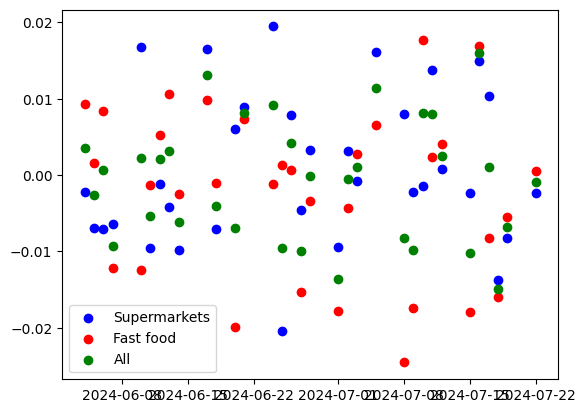

In [206]:
def getAverageDayChange(tickers, weights, label, start, end=0, color=0):
    hists = []
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        if end == 0:
            hists.append(stock.history(start=start))
        else:
            hists.append(stock.history(start=start, end=end))

    change = []
    for i in range(1, len(hists[0]["Close"])):
        current_change = 0
        for k in range(len(hists)):
            current_change += ((hists[k]["Close"][i] / hists[k]["Close"][i-1]) - 1) * weights[k]
        change.append(current_change / sum(weights))
    
    if color == 0:
        plt.scatter(hists[0].index[1:], change, label=label)
    else:
        plt.scatter(hists[0].index[1:], change, label=label, color=color)

    return change

start_date = "2024-06-01"
end_date = ""

stocks = ["WMT", "TGT", "MCD", "YUM", "CMG"]
supermarket_stocks = ["WMT", "TGT"]
fast_food_stocks = ["CMG", "YUM", "MCD"]

supermarket_change = getAverageDayChange(supermarket_stocks, [1]*2, "Supermarkets", start_date, color="blue")

fast_food_change = getAverageDayChange(fast_food_stocks, [1]*3, "Fast food", start_date, color="red")

all_change = getAverageDayChange(stocks, [3,3,2,2,2], "All", start_date, color="green")
    
plt.legend()

In [207]:
sum(all_change)/len(all_change), sum(supermarket_change)/len(supermarket_change), sum(fast_food_change)/len(fast_food_change)

all_series = pd.Series(all_change)
supermarket_series = pd.Series(supermarket_change)
fast_food_series = pd.Series(fast_food_change)
#Statistics of data
print(all_series.describe(percentiles=[.25, .5, .75]))
print(supermarket_series.describe(percentiles=[.25, .5, .75]))
print(fast_food_series.describe(percentiles=[.25, .5, .75]))

count    33.000000
mean     -0.000752
std       0.007940
min      -0.014913
25%      -0.006939
50%      -0.000074
75%       0.003600
max       0.015967
dtype: float64
count    33.000000
mean      0.000784
std       0.009942
min      -0.020494
25%      -0.006949
50%      -0.001399
75%       0.007969
max       0.019470
dtype: float64
count    33.000000
mean     -0.002289
std       0.010936
min      -0.024559
25%      -0.012227
50%      -0.001073
75%       0.005287
max       0.017693
dtype: float64


Look at distribution of market cap in S&P 500

In [186]:
ticker = yf.Ticker("GME")
ticker.get_dividends()

Date
2012-02-16 00:00:00-05:00    0.03750
2012-05-24 00:00:00-04:00    0.03750
2012-08-24 00:00:00-04:00    0.06250
2012-11-26 00:00:00-05:00    0.06250
2013-03-01 00:00:00-05:00    0.06875
2013-05-31 00:00:00-04:00    0.06875
2013-08-29 00:00:00-04:00    0.06875
2013-12-02 00:00:00-05:00    0.06875
2014-03-13 00:00:00-04:00    0.08250
2014-06-02 00:00:00-04:00    0.08250
2014-08-29 00:00:00-04:00    0.08250
2014-11-21 00:00:00-05:00    0.08250
2015-03-13 00:00:00-04:00    0.09000
2015-06-08 00:00:00-04:00    0.09000
2015-09-04 00:00:00-04:00    0.09000
2015-12-01 00:00:00-05:00    0.09000
2016-03-04 00:00:00-05:00    0.09250
2016-06-06 00:00:00-04:00    0.09250
2016-09-07 00:00:00-04:00    0.09250
2016-11-29 00:00:00-05:00    0.09250
2017-03-10 00:00:00-05:00    0.09500
2017-06-05 00:00:00-04:00    0.09500
2017-09-07 00:00:00-04:00    0.09500
2017-11-30 00:00:00-05:00    0.09500
2018-03-02 00:00:00-05:00    0.09500
2018-06-11 00:00:00-04:00    0.09500
2018-09-17 00:00:00-04:00    0.09

In [198]:
str(ticker.balance_sheet.iloc[2].index[0].date())

'2024-01-31'

In [ ]:
#Get dataframe of all tickers
constituents = pl.read_csv("../Data/sp500/Constituents.csv", infer_schema_length=False)

#Create list of individual stocks from names from dataframe
component_tickers=[]
for k in range(len(constituents)):
    component_tickers.append(constituents[k,0])